In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read the dataset

In [2]:
df = pd.read_excel('cust_data.xlsx')
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
df.shape

(30000, 38)

In [5]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [6]:
df['Gender'].fillna('None',inplace=True)
df.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [7]:
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [8]:
df['Gender'].value_counts()

F       22054
M        5222
None     2724
Name: Gender, dtype: int64

In [9]:
df['Gender'] = df['Gender'].replace({'F':1,'M':2,'None':3})
df.dtypes.value_counts()

int64    38
dtype: int64

In [11]:
data = df.iloc[:,1:]
print(data.columns)

Index(['Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')


#### Outlier Treatment

In [12]:
data.describe(percentiles=[0.95,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,97%,98%,99%,max
Gender,30000.0,1.355667,0.640922,1.0,1.0,3.0,3.0,3.00,3.0,3.0
Orders,30000.0,4.169800,3.590311,0.0,4.0,10.0,11.0,11.00,12.0,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.0,2.0,2.0,3.00,4.0,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.0,2.0,2.0,2.00,3.0,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.0,1.0,2.0,3.00,5.0,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.0,1.0,2.0,2.00,4.0,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.0,1.0,1.0,2.00,3.0,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.0,1.0,1.0,2.00,2.0,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.0,1.0,1.0,2.00,3.0,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.0,1.0,1.0,2.00,2.0,16.0


In [13]:
data.describe(percentiles=[0.01,0.02,0.03,0.05]).T

,count,mean,std,min,1%,2%,3%,5%,50%,max
Gender,30000.0,1.355667,0.640922,1.0,1.0,1.0,1.0,1.0,1.0,3.0
Orders,30000.0,4.169800,3.590311,0.0,0.0,0.0,0.0,0.0,4.0,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.0,0.0,0.0,0.0,0.0,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.0,0.0,0.0,0.0,0.0,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.0,0.0,0.0,0.0,0.0,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.0,0.0,0.0,0.0,0.0,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.0,0.0,0.0,0.0,0.0,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.0,0.0,0.0,0.0,0.0,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.0,0.0,0.0,0.0,0.0,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.0,0.0,0.0,0.0,0.0,16.0


In [14]:
def outlier_treament(x):
    x = x.clip(upper=x.quantile(0.99))
    return x

In [17]:
data.columns[2:]

Index(['Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

In [18]:
data[data.columns[2:]] = data[data.columns[2:]].apply(outlier_treament)

#### Standardization of data

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()
data_sc = sc.fit_transform(data)

print(type(data_sc))
print(data_sc.shape)

<class 'numpy.ndarray'>
(30000, 37)


### Elbow Method

In [23]:
from sklearn.cluster import KMeans

WCSS
 [1110000.0000000014, 1049873.1920477443, 1017671.5923548718, 986937.1883218525, 957894.7001889851, 936503.8951138965, 918002.2885559326, 892370.1053530447, 879212.6264024342]


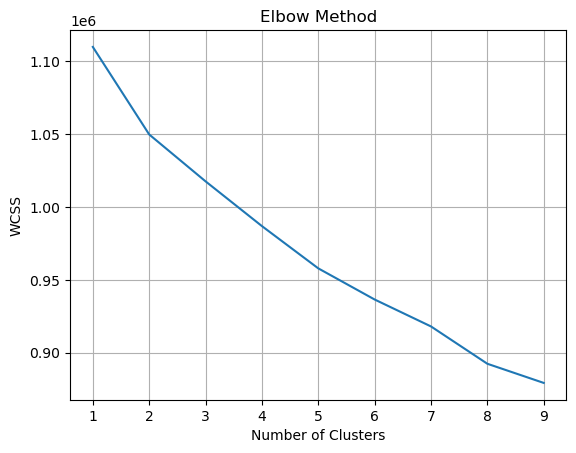

In [25]:
wcss = []
for i in range(1,10):
    m = KMeans(n_clusters=i)
    m.fit(data_sc)
    wcss.append(m.inertia_)
    
print('WCSS\n',wcss)
plt.plot(list(range(1,10)),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

In [28]:
sscore = []
for i in range(2,10):
    m = KMeans(n_clusters=i)
    m.fit(data_sc)
    sscore.append(silhouette_score(data_sc,m.labels_))

In [29]:
sil_score = pd.DataFrame({'Num_of_Clusters':list(range(2,10)),'Sil_Score':sscore})
sil_score

,Num_of_Clusters,Sil_Score
0,2,0.327380
1,3,0.197160
2,4,0.184600
3,5,0.182068
4,6,0.032758
5,7,0.028206
6,8,0.041776
7,9,0.115219


### Infernce
Optimal Number of clsuters = 2,3 or 4


In [30]:
data_sc = pd.DataFrame(data_sc,columns=data.columns)
data_sc.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1.005339,0.788301,-0.369745,-0.392663,-0.276129,-0.249499,-0.262208,-0.318596,-0.227765,5.475776,...,-0.246854,-0.413938,-0.499215,-0.342535,-0.229317,-0.217325,-0.348476,-0.297541,-0.246301,-0.208302
1,-0.554939,-1.161423,-0.369745,1.266711,-0.276129,-0.249499,-0.262208,-0.318596,-0.227765,-0.252023,...,-0.246854,1.201535,-0.499215,-0.342535,-0.229317,-0.217325,-0.348476,-0.297541,-0.246301,-0.208302
2,1.005339,0.788301,-0.369745,1.266711,-0.276129,-0.249499,-0.262208,-0.318596,-0.227765,-0.252023,...,-0.246854,-0.413938,-0.499215,-0.342535,-0.229317,-0.217325,-0.348476,2.494526,-0.246301,-0.208302
3,-0.554939,-1.161423,-0.369745,-0.392663,-0.276129,-0.249499,-0.262208,-0.318596,-0.227765,-0.252023,...,-0.246854,-0.413938,-0.499215,-0.342535,-0.229317,-0.217325,-0.348476,-0.297541,-0.246301,-0.208302
4,2.565616,1.623898,-0.369745,-0.392663,-0.276129,-0.249499,-0.262208,-0.318596,-0.227765,-0.252023,...,-0.246854,-0.413938,2.226504,-0.342535,-0.229317,-0.217325,-0.348476,-0.297541,2.838885,3.195319


In [31]:
data1 = data.copy()
data2 = data.copy()

#### KMeans at K=2

In [32]:
model = KMeans(n_clusters=2,random_state=0)
model.fit(data_sc)
ypred = model.predict(data_sc)
cent = model.cluster_centers_

In [33]:
data2['C2'] = ypred
data2.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,C2
0,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,3,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0


In [36]:
r1 = data2.iloc[:,:-1].mean().reset_index().set_index('index').T
r1.index = ['Mean']
r1

index,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Mean,1.355667,4.1698,0.252933,0.236633,0.203533,0.143133,0.123667,0.125333,0.096733,0.088,...,0.087533,0.256233,0.3663,0.144533,0.069133,0.0451,0.179767,0.106567,0.079833,0.0612


In [37]:
r2 = data2.groupby('C2').mean()
r2

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
C2,,,,,,,,,,,,,,,,,,,,,
0,1.190909,4.487390,0.574194,0.535777,0.403226,0.283284,0.246921,0.265982,0.252493,0.223754,...,0.355132,0.693548,0.799413,0.586804,0.273314,0.181525,0.550733,0.291202,0.345455,0.334897
1,1.376796,4.129071,0.211734,0.198270,0.177924,0.125160,0.107860,0.107296,0.076758,0.070590,...,0.053215,0.200150,0.310756,0.087815,0.042948,0.027604,0.132193,0.082888,0.045769,0.026100


In [39]:
res_cluster2 = pd.concat([r1,r2])
res_cluster2.T

,Mean,0,1
Gender,1.355667,1.190909,1.376796
Orders,4.169800,4.487390,4.129071
Jordan,0.252933,0.574194,0.211734
Gatorade,0.236633,0.535777,0.198270
Samsung,0.203533,0.403226,0.177924
Asus,0.143133,0.283284,0.125160
Udis,0.123667,0.246921,0.107860
Mondelez International,0.125333,0.265982,0.107296
Wrangler,0.096733,0.252493,0.076758
Vans,0.088000,0.223754,0.070590
